# IMPORT NEEDFUL LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import *

# EDA (Checking datatypes, null values, visualization and describe)

In [2]:
data=pd.read_csv('diabetes.csv' )
data.shape

(768, 9)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


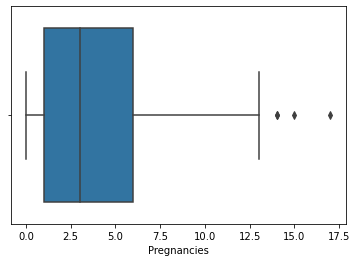

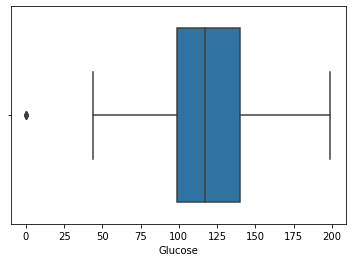

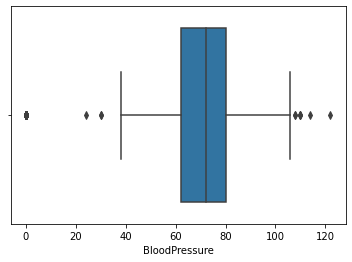

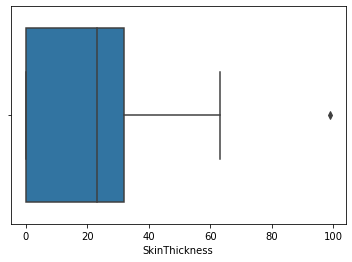

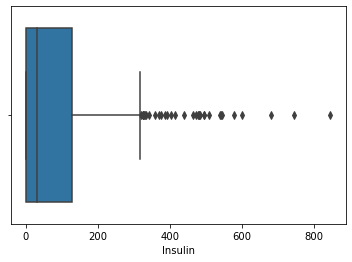

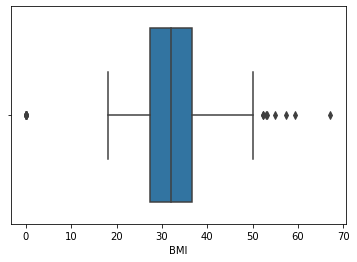

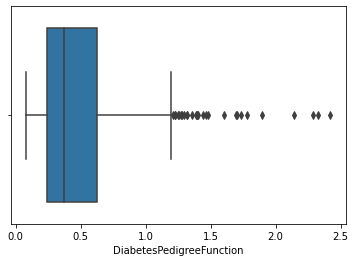

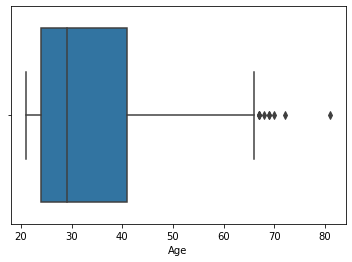

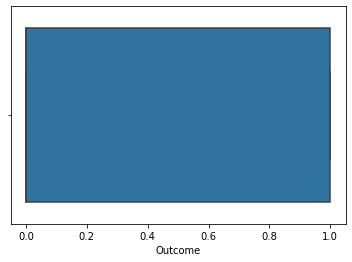

In [6]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

# Data Cleaning and manipulations (Treating Outliers, null values, label encoding, feature scaling, VIF if needed)

# Splitting into Train and Test Data

In [7]:
X=data.iloc[:,:-1]
Y=data.Outcome
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

# Decision Tree Model creation, training and testing the model

In [12]:
dtmodel=tree.DecisionTreeClassifier()
dtmodel.fit(x_train, y_train)
y_pred=dtmodel.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("The accuracy score for the model is", accuracy_score(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[128  29]
 [ 28  46]]
The accuracy score for the model is 0.7532467532467533
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       157
           1       0.61      0.62      0.62        74

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

